## Active Learning

Download the titanic dataset here: https://drive.google.com/file/d/0Bz9_0VdXvv9bbVhpOEMwUDJ2elU/view?usp=sharing

In this exercise, we will simulate active learning. We will keep the small sample of observations for testing and we will test how quality of the model rises when we use active learning to choose labeled observations.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the Data into variable df

In [3]:
df = pd.read_csv('/home/henri/Documents/Lighthouse-lab/Databases/w8-weekend-db/titanic_dataset.csv')

In [4]:
df.shape

(891, 12)

In [5]:
# TEST SAMPLE
# USE THIS SAMPLE ONLY FOR TESTING
test_df = df.sample(n=100, random_state=42)
# KEEP ONLY THOSE WHO ARE NOT IN THE TEST SET
df = df[~df.PassengerId.isin(test_df.PassengerId.tolist())]

In [6]:
# FIT THE FIRST MODEL ONLY ON THE DATAFRAME START_DF
start_df = df.sample(n=100, random_state=42)
# DROP OBS FROM START_DF FROM DF
df = df[~df.PassengerId.isin(start_df.PassengerId.tolist())]

### Tasks

1. fit the first model only on the **start_df** using **SVM** and evaluate accuracy, precision and recall on test_df
2. in each iteration, add 10 observations from **df** to your trainset (choose the observation using active learning approach) 
    - score all observations in df and take 10 where the model isn't sure what class it is. The probability of surviving will be around 50% 
3. refit the model and evaluate on **test_df** again.    
3. the goal is to converge to the optimal solution as fast as possible by choosing **right** observations in each iteration
4. plot the graphs for each eval metric, where on the axis x is iteration number, on y is the metric value for that model

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
def preprocessing(data):
    
    # Get relevant columns
    clean_data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

    # Impute mean for null values in age
    clean_data['Age'] = clean_data['Age'].fillna(np.mean(clean_data['Age']))

    # get dummies for sex
    data_reduced = pd.get_dummies(clean_data, columns=['Sex', 'Embarked'])
    data_reduced = data_reduced.reset_index(drop=True)
    
    if 'Embarked_C' not in data_reduced.columns:
        data_reduced['Embarked_C'] = 0
    if 'Embarked_S' not in data_reduced.columns:
        data_reduced['Embarked_S'] = 0
    if 'Embarked_Q' not in data_reduced.columns:  
        data_reduced['Embarked_Q'] = 0
    
    # Extract target
    y= data_reduced['Survived']

    # Scale Data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_reduced)
    scaled_df = pd.DataFrame(scaled_data, columns=data_reduced.columns)

    # Get X
    X = scaled_df.drop(columns = ['Survived'])
    
    return X, y

In [9]:
acc_scores = []
prec_scores = []
rec_scores = []

In [10]:
### This will all be within for loop pipeline

for i in range((len(df)//10)-1):

    X, y = preprocessing(start_df)

    clf = SVC(probability=True)
    clf.fit(X, y)

    # test_df preprocessing

    test_X, test_y = preprocessing(test_df)

    y_pred = clf.predict(test_X)

    accuracy = accuracy_score(test_y,y_pred)
    precision = precision_score(test_y,y_pred)
    recall = recall_score(test_y,y_pred)

    acc_scores.append(accuracy)
    prec_scores.append(precision)
    rec_scores.append(recall)

    X_score, y_score = preprocessing(df)
    scores = clf.predict_proba(X_score)
    scores_arr = []

    for i in range(len(scores)):
        scores_arr.append(max(scores[i]))
        scores_arr[i] = scores_arr[i]/0.5

    scores_arr = np.array(scores_arr)
    smallest = np.argpartition(scores_arr, 10)
    smallest = smallest[0:10]
    start_df = start_df.append(df.iloc[smallest])
    df = df[~df.PassengerId.isin(start_df.PassengerId.tolist())]

In [11]:
len(acc_scores)

68

In [12]:
x_values = [i for i in range(68)]

In [13]:
x_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67]

In [14]:
print(acc_scores)
print('=' * 50)
print(prec_scores)
print('=' * 50)
print(rec_scores)

[0.81, 0.82, 0.82, 0.83, 0.83, 0.83, 0.83, 0.83, 0.82, 0.81, 0.81, 0.81, 0.83, 0.83, 0.84, 0.83, 0.83, 0.83, 0.84, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84]
[0.7692307692307693, 0.7894736842105263, 0.7894736842105263, 0.7948717948717948, 0.7948717948717948, 0.7948717948717948, 0.7948717948717948, 0.7948717948717948, 0.7894736842105263, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.8285714285714286, 0.8285714285714286, 0.8333333333333334, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8333333333333334, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.8285714285714286, 0.82857142

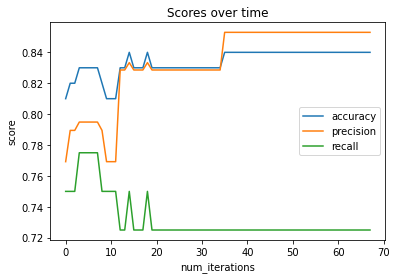

In [15]:
# line 1 points
x1 = x_values
y1 = acc_scores
# plotting the line 1 points 
plt.plot(x1, y1, label = "accuracy")
# line 2 points
x2 = x_values
y2 = prec_scores
# plotting the line 2 points 
plt.plot(x2, y2, label = "precision")
# line 3 points
x3 = x_values
y3 = rec_scores
# plotting the line 3 points 
plt.plot(x3, y3, label = "recall")
plt.xlabel('num_iterations')
# Set the y axis label of the current axis.
plt.ylabel('score')
# Set a title of the current axes.
plt.title('Scores over time')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()